# <center>**Medical Cost Prediction**</center>

The aim of theis analysis is to predict the medicaal expense based on the patient's information.THe dataset used for this analysis is Insurance dataset from  [Kaggle](https://www.kaggle.com/mirichoi0218/insurance).The dataset contains **1338 observations** and **7 Variables**. The variables are as follows:

| **Variables** | **Description** |
| ---- | --- |
| age | age of primary beneficiary |
| bmi |  body mass index |
| children | number of children covered by healyh insurancce |
| smoker | smoking |
| region | the beneficiary's residential area in the US |
| charges | individual medical costs billed by health insurance |

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\Data Analysis\\Data-Science-Projects-main\\Medical Cost Prediction\\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **Data Preprocessing-1**

In [4]:
# Numbers of rows and columns
df.shape

(1338, 7)

In [5]:
# Checking the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Checking discription statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# VAlue Counts for categorical variables
print(df.sex.value_counts(), df.smoker.value_counts(), df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 smoker
no     1064
yes     274
Name: count, dtype: int64 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### **Replacing the categorical variables with numerical values.**

- **sex:** 1-male, 0-females
- **smoker:** 1-yes, 0-no
- **region:** 0-southwest, 1-southeast, 2-northwest, 3-northeast

In [8]:
# Chacking categorical variables to numerical
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# **Exploratory Data Analysis**

Visualization of the data is a good way to understand the data.In this section, I will plot the distribution of each variable to get an overview about their counts and distributions.

### **Age Distribution**

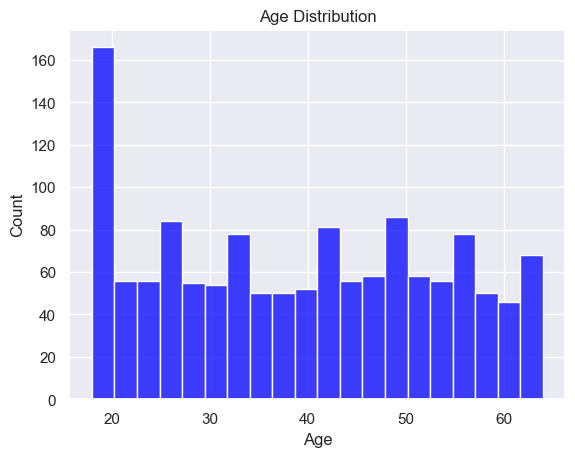

In [10]:
# Age Distribution

sns.set(style = 'darkgrid') 
sns.histplot(df.age, bins = 20, kde = False, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

### **Gender Distribution**

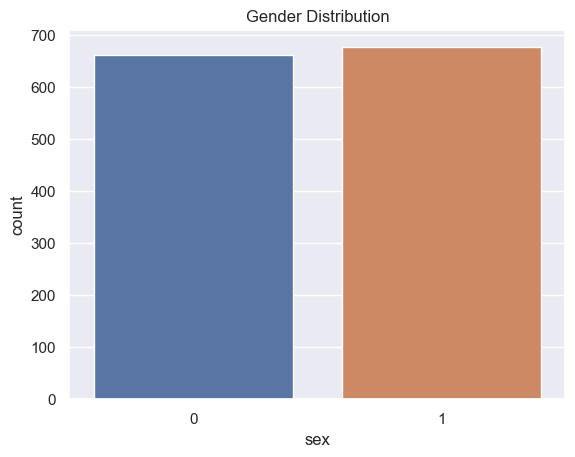

In [11]:
sns.countplot(data  = df, x = 'sex'
             )
plt.title('Gender Distribution')
plt.show()

It is clear that number of **males** and **females** are almost equal in the dataset.

### **BMI Distribution**

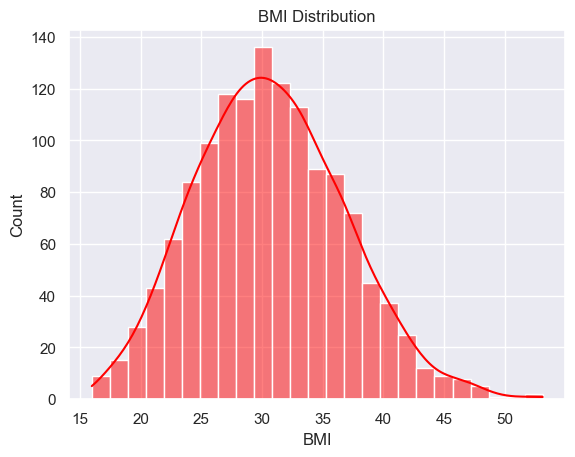

In [12]:
sns.histplot(data = df, x = 'bmi', kde = True, color = 'red')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

The majority of the patients have BMI beyween **25** and **40** which is considered as overweight and could be a major factor in increasing the medical cost.

### **Children Distribution**

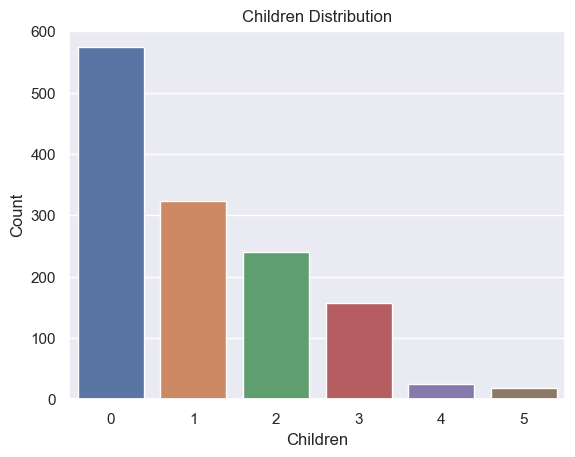

In [13]:
sns.countplot(data = df, x = 'children')

plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

### **Region Distribution**

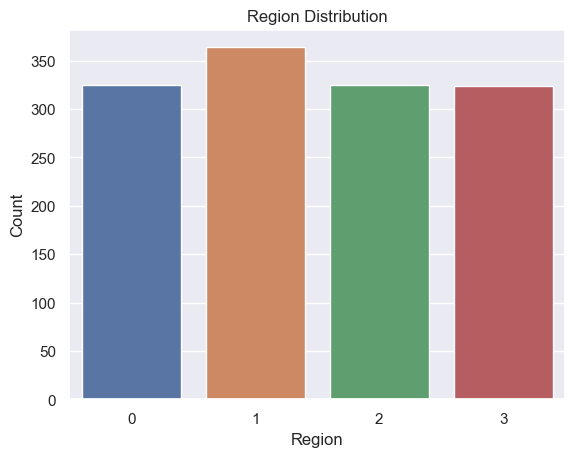

In [14]:
sns.countplot(data = df, x = 'region')

plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The count of patient from **SouthWest** is slighltly higher than the other regions, but the numbers of patients from other regions are almost equal.

### **Smoker Count**

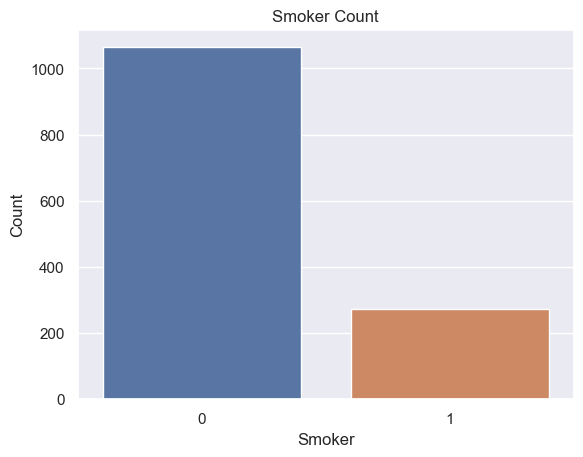

In [15]:
sns.countplot(data = df, x = 'smoker')

plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


Smokers are very few in the dataset, Nearly 80% of the patients are **Non-Smokers**.

### **Smoker Count with respect to the children counts.**

<Axes: xlabel='smoker', ylabel='count'>

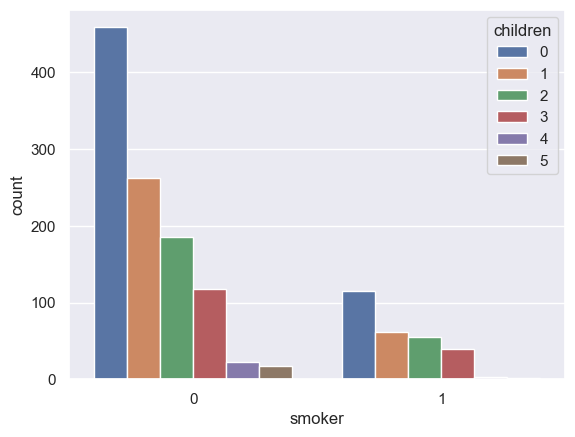

In [16]:
sns.countplot(data = df, x = 'smoker', hue = 'children')

### **Charges Distribution**

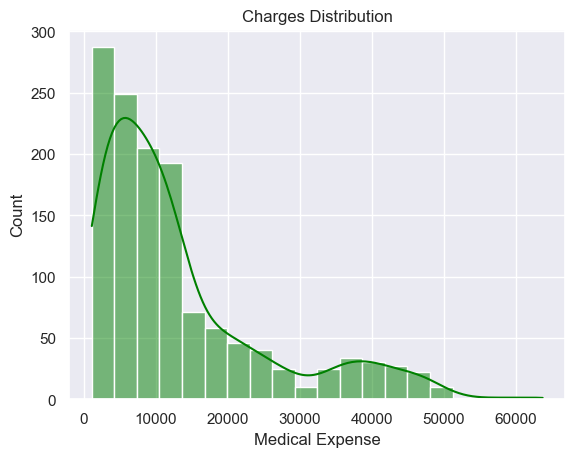

In [17]:
sns.histplot(data = df, x = 'charges', bins = 20, kde = True, color = 'green')

plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expenses are below **20000**, with nen=gligible number of patients having medical expenses above **50000**.

### From the above plots we have a clear understanding about the count of patients under each category of the variables. Now I will look into the co-relation between the variables. 

# **Co-Relation**

In [18]:
# co-relation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


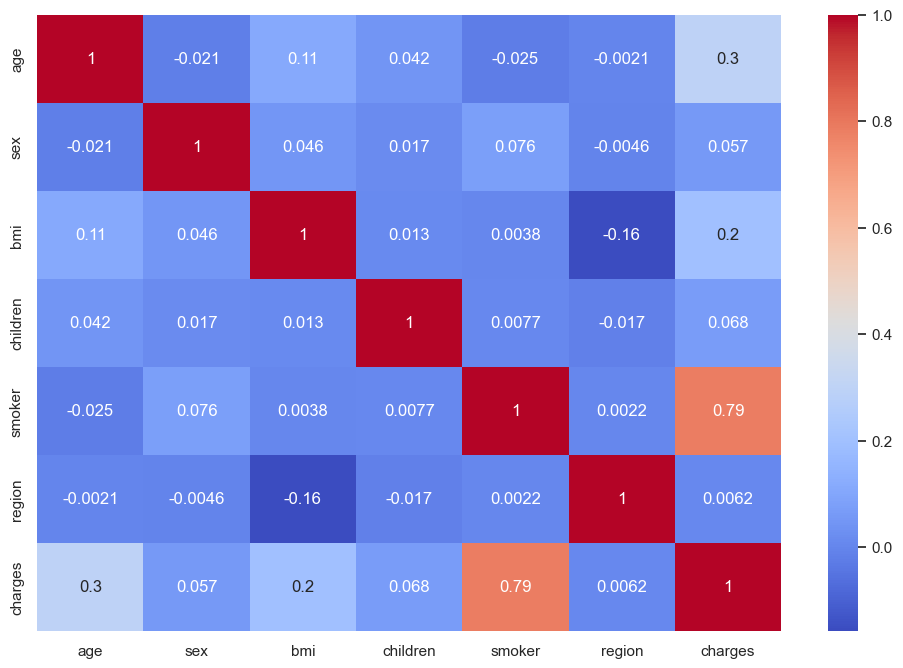

In [41]:
# Plotting the co-relation heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

The variable smoker shows a significant co-relation with the medical expenses.Now I will explore more into patients smoking habits and their relation with other factors.

### **Ploting the smoker count with Patients gender**

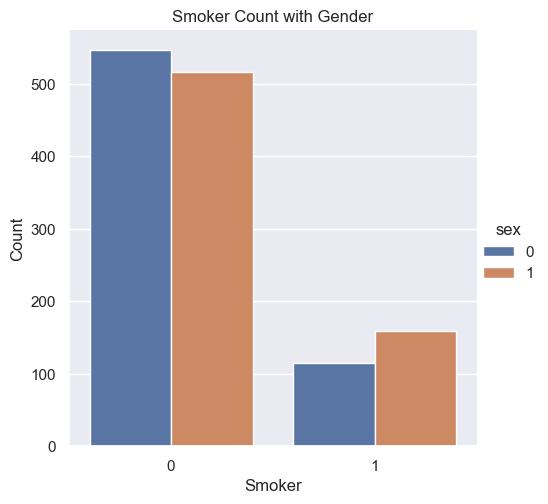

In [27]:
sns.catplot(data = df, x = 'smoker', kind = 'count', hue = 'sex')

plt.title('Smoker Count with Gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

We can notive more **Male Smokers** than **Females Smokers**. So I will assume that medical trearment expense for males would be more than  females, given the impact of smoking on the medical expenses.

<Axes: xlabel='sex', ylabel='charges'>

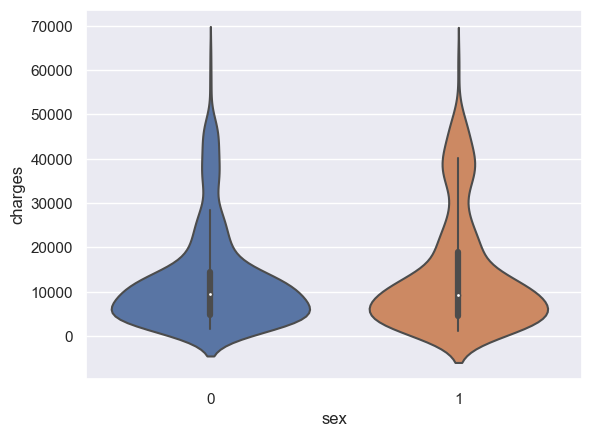

In [28]:
sns.violinplot(data = df, x = 'sex', y = 'charges')

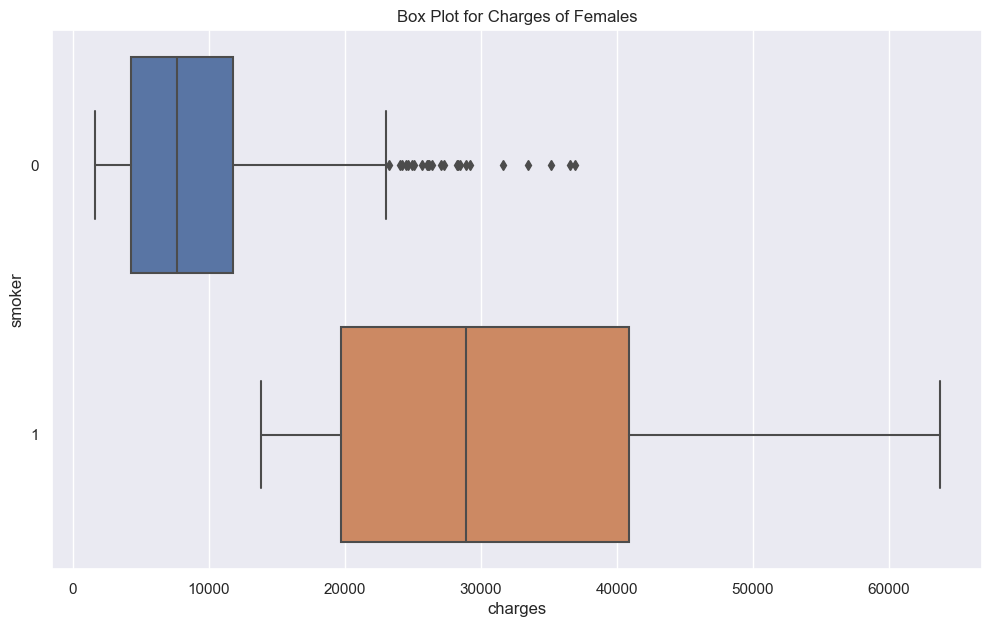

In [35]:
plt.figure(figsize = (12, 7))
sns.boxplot(data = df[(df.sex == 0)], x = 'charges', y = 'smoker', orient = 'h')
plt.title('Box Plot for Charges of Females')
plt.show()

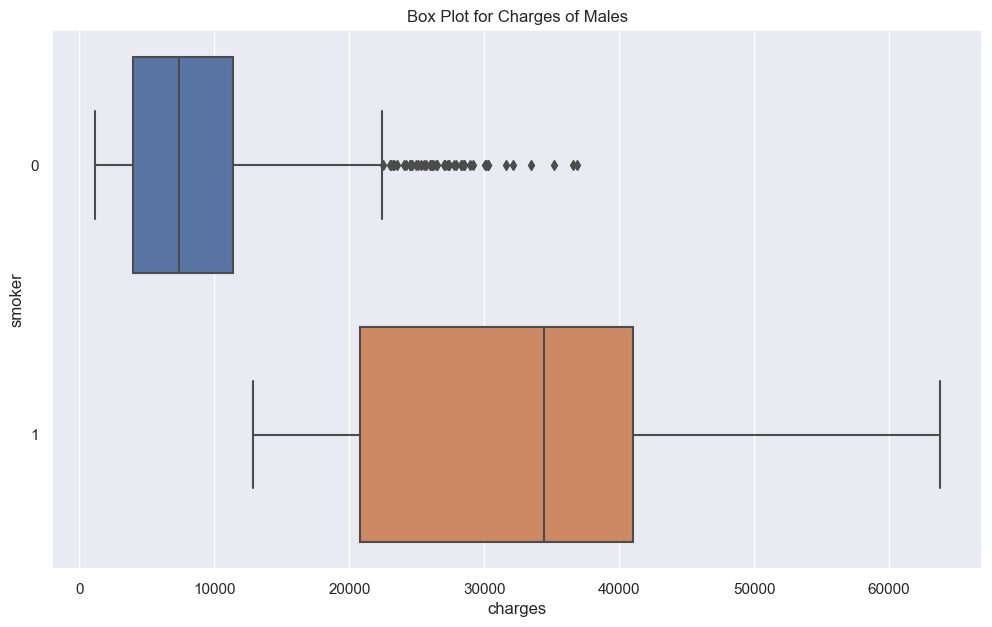

In [38]:
plt.figure(figsize = (12, 7))
sns.boxplot(data = df, x = 'charges', y = 'smoker', orient = 'h')
plt.title('Box Plot for Charges of Males')
plt.show()

The assumption is true that the medical expenses of **males** is greater than tahr of **females**.In additution to that medical expenses of smokers is greater than that of **non-smokers**.

### **Smokers and Age Distribution**

<Figure size 1200x800 with 0 Axes>

C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


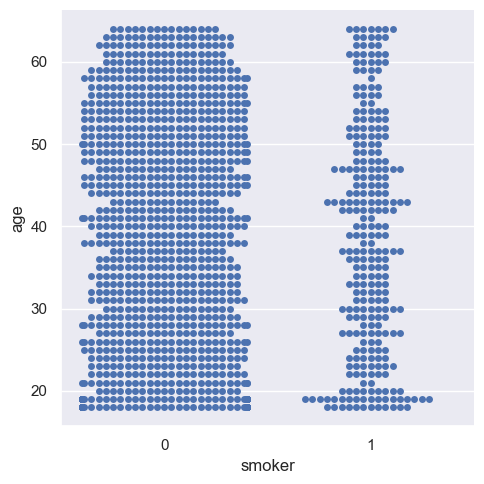

In [42]:
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = 'smoker', y = 'age', kind = 'swarm')
plt.show()

From the graph we can see that there significant nummber of smokers of age 19. Now I will study the medical expenses of smokers of age 19.

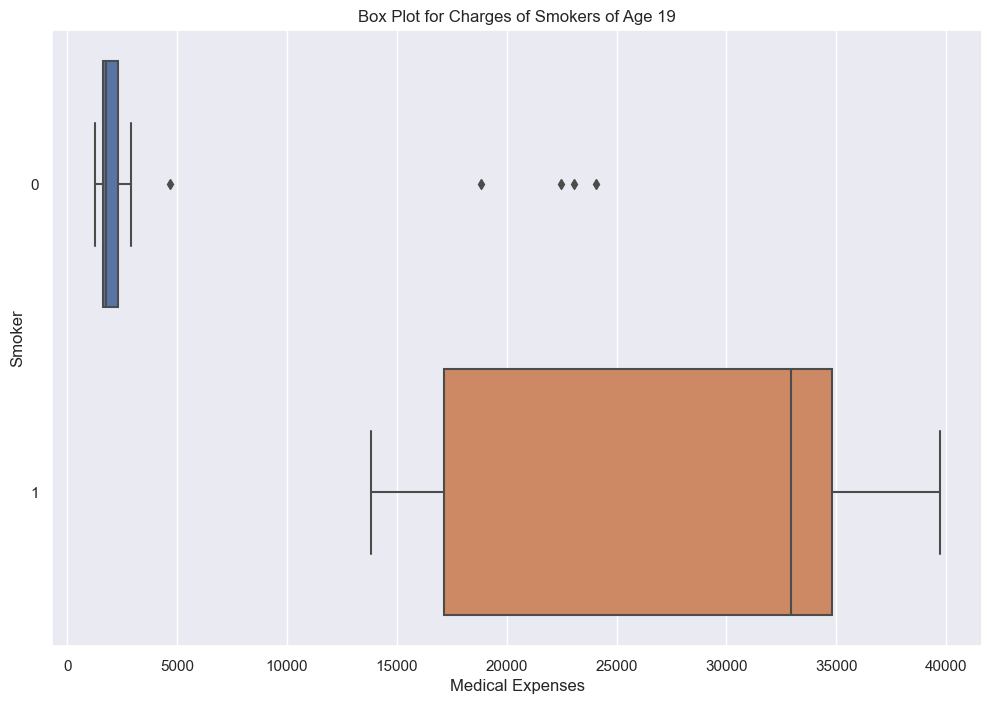

In [43]:
# Smokers of age 19

plt.figure(figsize = (12, 8))
sns.boxplot(data = df[(df.age == 19)], x = 'charges', y = 'smoker', orient = 'h')
plt.title('Box Plot for Charges of Smokers of Age 19')
plt.xlabel('Medical Expenses')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expenses of smokers of age 19 is very high in comparison to non-smokers. In non smokers we can see some outlinnes which may be due to liness or scciddents.

It is clear that the medical expenses of smokers is higher than that of non-smokers. Now I will plot the charges distribution with repect to patients age of smokers and non-smokers.

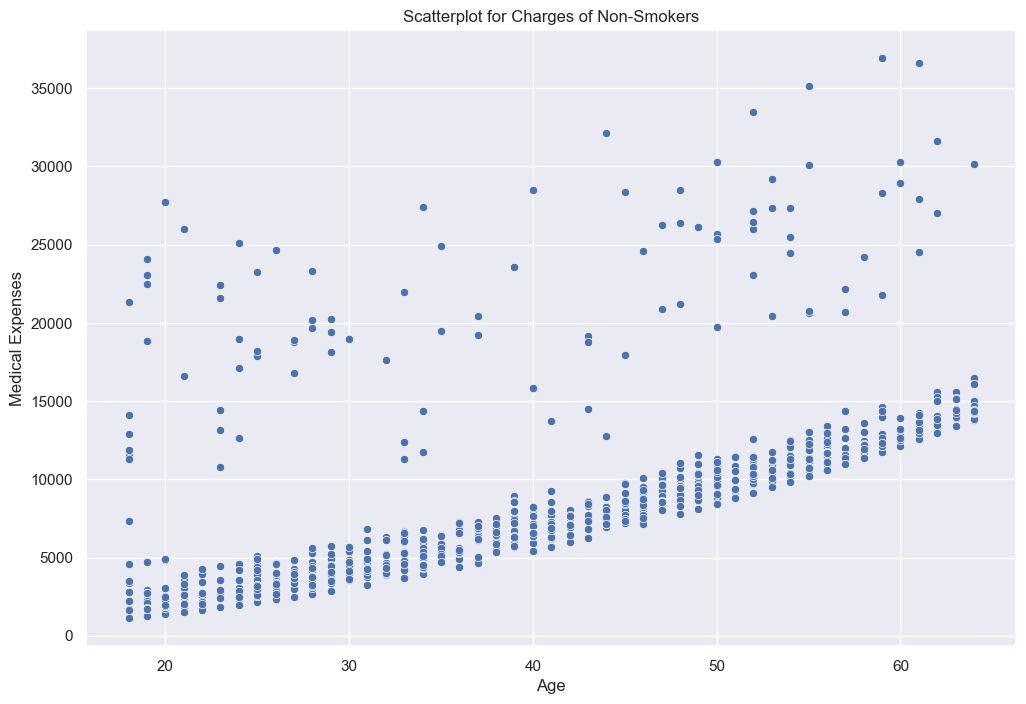

In [44]:
# Non- Smokers charges Distribution
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df[(df.smoker == 0)], x = 'age', y = 'charges')
plt.title('Scatterplot for Charges of Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

MAjority of the points shows that medical expenses increases with age which may be due to the fact older peoplle are more prone to illness. But there are some outline which shows that there are other illness or accidents which may increase the medical expense.

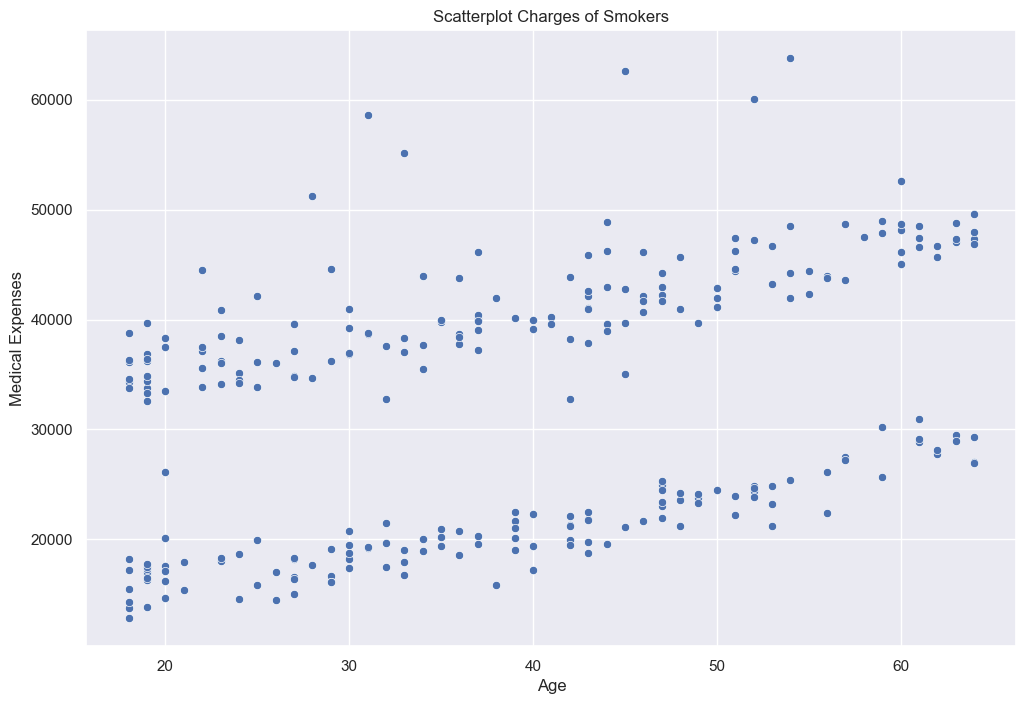

In [45]:
# Smokers Charges Distribution
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df[(df.smoker == 1)], x = 'age', y = 'charges')
plt.title('Scatterplot Charges of Smokers')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

Here we see pecularity in the graph. In the graph there are two segments, One with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

Now in order to get a more clear picture, I will combine these two scatterplot graphs.

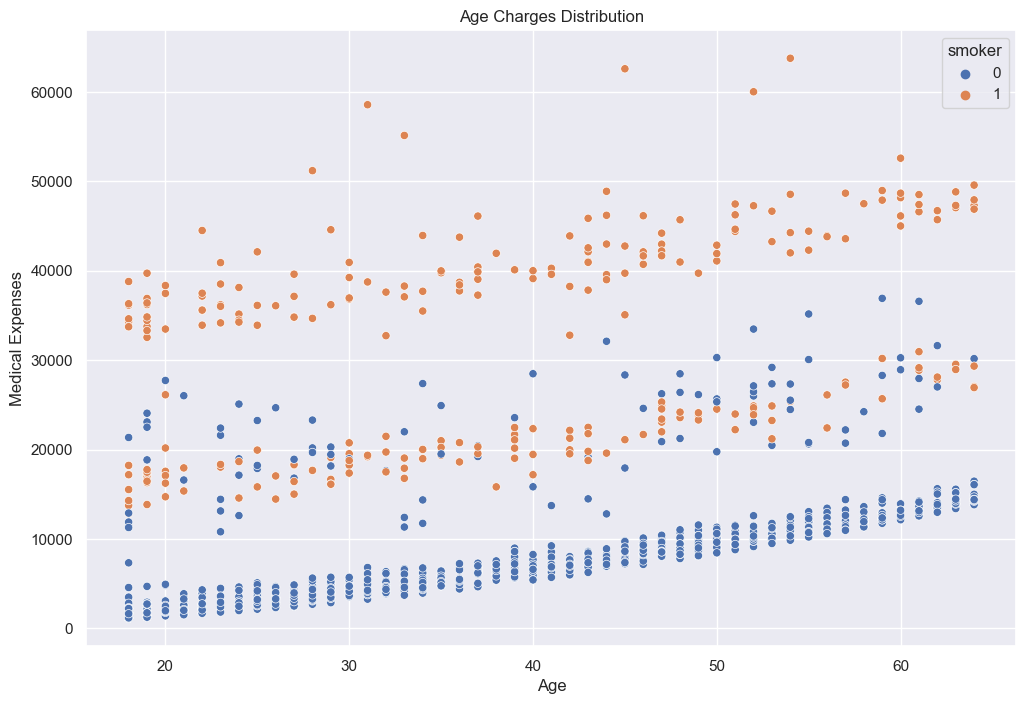

In [51]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker')
plt.title('Age Charges Distribution')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

Now we clearly understad the variation in charges with respect to **age** and  **smokinf habits**. The medical expense of smokers is higher than that of **non-smokers**. In non-smokers the cost of  tratment increases with age which is obvious. But in smokers the cost of treatment is high even for younger patients which means the smoking patients are spending upon thier smoking related illness as well age related illness.

### **Charges Distribution for Patients with BMI greater thaan 30 i.e. obese patients**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\1967183431.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


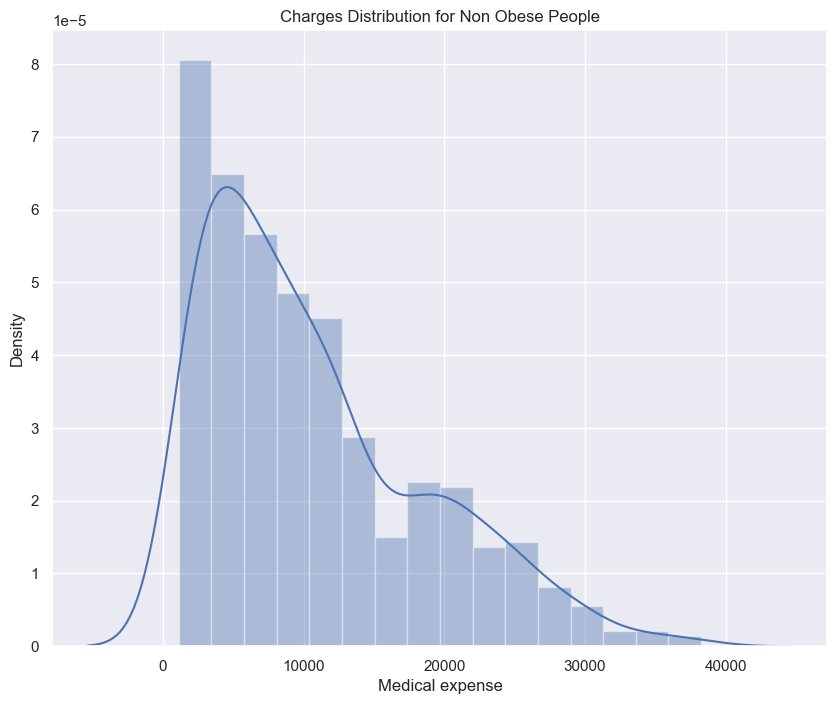

In [53]:
plt.figure(figsize = (10, 8))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical expense')
plt.show()

Therefor ethe EDA we have a clear understanding about the data and the co-relation between the variables. Now I will build a model to predict the medical expense of patients.

# **Train and Split**

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges', axis = 1), df['charges'], test_size = 0.2, random_state = 0)

# **Model Building**

### **Linear Regression**

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [56]:
# Model Traininng
lr.fit(x_train, y_train)

# Model Accuracy
lr.score(x_train, y_train)

0.7368306228430945

In [57]:
# Model Prediction
y_pred = lr.predict(x_test)

# **Polynomial Regression**

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [61]:
# Transforming the  features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size = 0.2, random_state = 0)

In [62]:
plr = LinearRegression()

# Model Training
plr.fit(x_train, y_train)

# Model Accuracy
plr.score(x_train, y_train)

0.8363734872328255

In [63]:
# Model Prediction 
Y_pred = plr.predict(x_test)

# **Decision Tree Regressor**

In [65]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [66]:
# Model Training
dtree.fit(x_train, y_train)

# Model Accuracy
dtree.score(x_train, y_train)

0.9993688476658964

In [67]:
# Model Prediction
dtree_pred = dtree.predict(x_test)

# **Random Forest Regressor**

In [70]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf

RandomForestRegressor()

In [71]:
# Model Training 
rf.fit(x_train, y_train)

# Model Accuracy
rf.score(x_train, y_train)

0.9744739065505484

In [72]:
# Model Prediction 
rf_pred = rf.predict(x_test)

# **Model Evaluation**

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **Linear Regression**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\2540784542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Value')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\2540784542.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



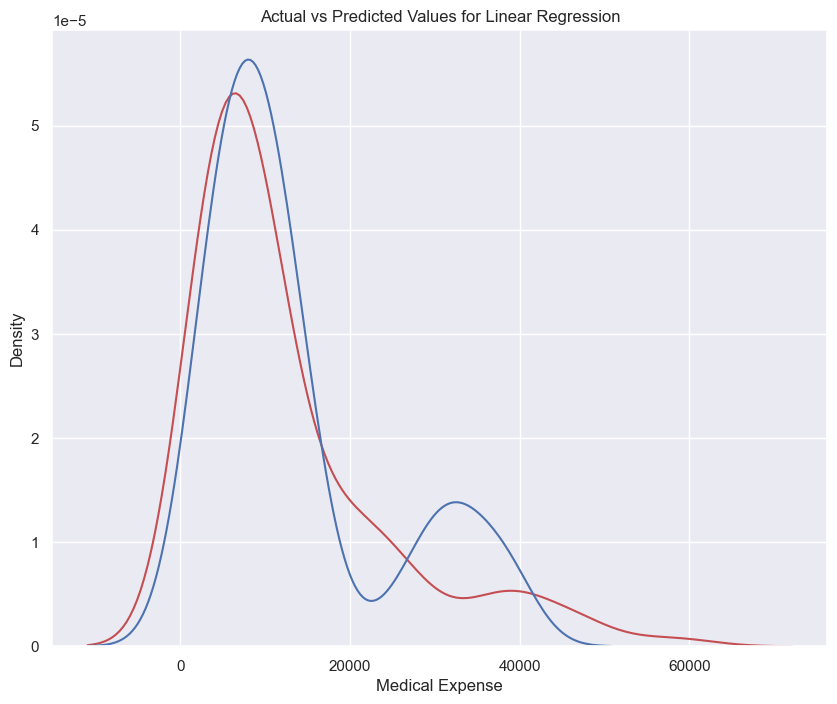

In [76]:
# Distributionn of actual predicted values
plt.figure(figsize = (10, 8))
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Value')
sns.distplot(y_pred, hist =False,  color = 'b', label = 'Predicted Value', ax = ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

## **Polynomial Regression**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\4014397688.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist = False, color = 'g', label = 'Actual Value')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\4014397688.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



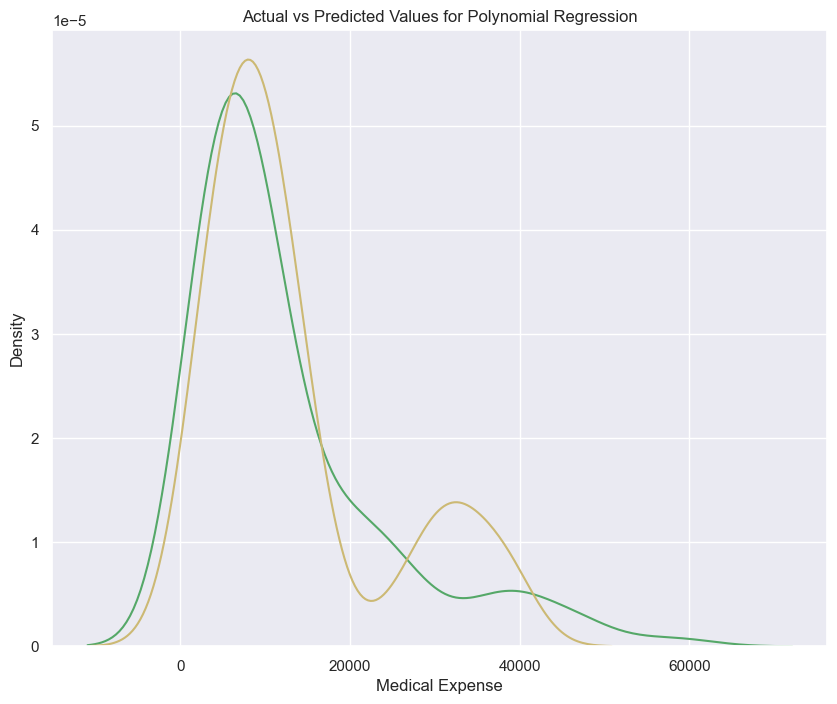

In [82]:
# Actual vs Predicted values for polynomial regression
plt.figure(figsize = (10, 8))
ax1 = sns.distplot(y_test, hist = False, color = 'g', label = 'Actual Value')
sns.distplot(y_pred, hist = False, color = 'y', label = 'Predicted Value', ax= ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

## **Decision Tree Regression**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\922060472.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax  = sns.distplot(y_test, hist = False, color = 'purple', label = 'Actual Value')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\922060472.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

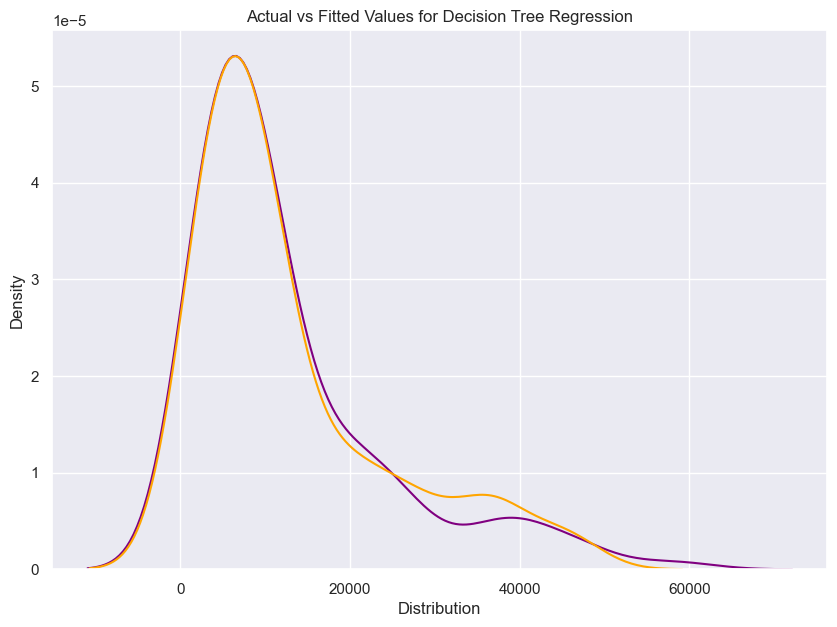

In [87]:
plt.figure(figsize = (10, 7))
ax  = sns.distplot(y_test, hist = False, color = 'purple', label = 'Actual Value')
sns.distplot(dtree_pred, hist = False, color = 'orange', label = 'Fitted Values', ax = ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Distribution')
plt.show()

In [91]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))

MAE: 3440.1241938785042
MSE: 51185073.05338556
RMSE: 7154.374399860939
Accuracy: 0.6286278973872652


## **Random Forest Regressor**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\674576689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = 'maroon', label = 'Actual Value')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16856\674576689.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

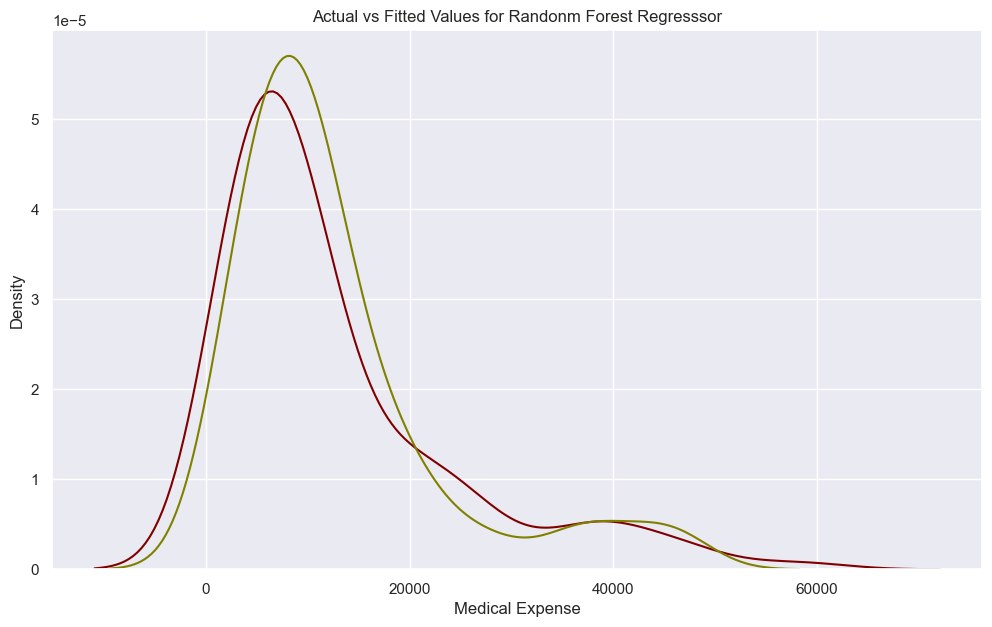

In [89]:
plt.figure(figsize = (12, 7))
ax = sns.distplot(y_test, hist = False, color = 'maroon', label = 'Actual Value')
sns.distplot(rf_pred, hist = False, color = 'olive', label = 'Fitted Values')
plt.title('Actual vs Fitted Values for Randonm Forest Regresssor')
plt.xlabel('Medical Expense')
plt.show()

In [90]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2843.7549664483254
MSE: 26135074.350656807
RMSE: 5112.247485270721
Accuracy: 0.8103775781775192


# **Conclusion**

Form the above models we can see that **Decision Tree Regressor** and **Random Forest Regressor** are giving the best result, but **Random Forest Regressor** is giving the best results with the least value. Therefrore I will use **Random Forest Regressor** to predict the medical expense of patients.

Moreover the medical expaense of smokers is higher than that of **Non-Smoker**. The medical expense of patients with **BMI greater than 30** is higher than that of patients with **BMI less than 30**. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis we can conclude that the medical expense of patients depends on their **Age**, **BMI**, **Smoking Habits**.